# Atividade Prática Suipervisionada - Parte 1
O objetivo que escolhemos foi o de climate action, ou de alterações climáticas mundiais. Esse objetivo possui extrema relevância de ser estudado, uma vez que caso esse não seja policiado, teremos diversos malefícios tanto para nós, seres humanos quanto para com todo o resto do ecossistema mundial (animais, climas, solos, entre outros). 

Alguns exemplos são: aumento de desastres naturais como secas, inundações, chuva ácida; nível do mar subindo; agravamento na saúde das pessoas (causando uma maior incidência de bronquite e asma); etc.

O indicador que escolhemos dentro da alteração climática mundial foi a <strong>variação nas emissões de gás carbônico (toneladas métricas per capita)</strong>. O gás carbônico é um gás de efeito estufa. Isso quer dizer que ele absorve o calor da atmosfera, e irradia-o para todas as direções. Como uma dessas direções inclui a Terra, ele acaba esquentando a face da Terra. Naturalmente, esse efeito é bom, porque é ele que previne um congelamento total da Terra como vimos na era do gelo; porém, ao emitir quantidades excessivas de gás carbônico, estamos esquentando a Terra, causando mudanças drásticas à temperatura.

Algo interessante para considerar é que as variações de temperatura causadas pelo efeito estufa não só aumentam a temperatura média, mas surpreendentemente podem deixar os invernos mais frios.  Esses invernos são causados pelos vórtices polares, vórtices que carregam ventos frios por volta dos polos. Ao esquentar a Terra, os vórtices enfraquecem-se, resultando em vários vórtices pequenos que causam frentes frias pelo mundo. Isso pode ser perigoso como pode acabar causando crises de fome e falta de adaptação em países sem a infraestrutura necessária para se proteger do frio.

Portanto, a luta contra o aumento de emissões CO2 é indispensável. A partir dos dados supracitados e com consciência das possibilidades para o futuro, temos como dever controlar nossas próprias ações e suas consequências em relação ao resto do mundo, por isso devemos analisar e compreender os dados reunidos, referentes à quantidade emitida de CO2 no mundo por tonelada, e a partir desses, tomar decisões as quais nos permitam contornar e melhorar a situação que nos encontramos.

Escolhemos 3 países como amostra: 
<ul>
<li>Brasil;</li>
<li>País com métricas defasadas, em relação ao Brasil: China;</li>
<li>País avançado, também em acordo com o mesmo: Dinamarca.</li>
</ul>

Optamos por escolher a China por possuir um histórico de longa data no setor industrial, produção e manufatura, por isso esse acaba sendo um país com alta nos índices de emissão de CO2. Além disso, selecionamos a Dinamarca por conta de sua tendência de queda na emissão de CO2, menor que a tendência do Brasil que manteve-se, praticamente, constante. Destarte, os três países representam claramente um avanço em relação ao ODS (Dinamarca), O Brasil, neutro ao ODS por manter suas emissões praticamente constantes, e a China, defasada em relação ao ODS.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [56]:
path = 'data/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_4353266/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_4353266.csv'
df = pd.read_csv(path, skiprows=4, sep=',', decimal='.', encoding='latin1')

# Utilizar apenas os dados disponíveis (entre 1960 e 2019)
for i in range(1960, 1991):
    del df[str(i)]
df.drop(['2020', '2021', 'Unnamed: 66'], axis=1, inplace=True)

df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.953224,0.915661,0.916485,0.917093,0.936570,0.947393,...,1.021548,0.979352,0.992616,1.005027,1.016649,0.966589,0.948410,0.937926,0.917507,0.913618
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.167682,0.095958,0.084721,0.075546,0.068468,0.062588,...,0.243614,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.530016,0.568305,0.523529,0.470888,0.501681,0.564390,...,0.472077,0.476789,0.480603,0.508099,0.515960,0.494065,0.499405,0.483140,0.486456,0.493923
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.544539,0.543557,0.708984,0.836804,0.912141,1.072168,...,0.976184,0.985522,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137


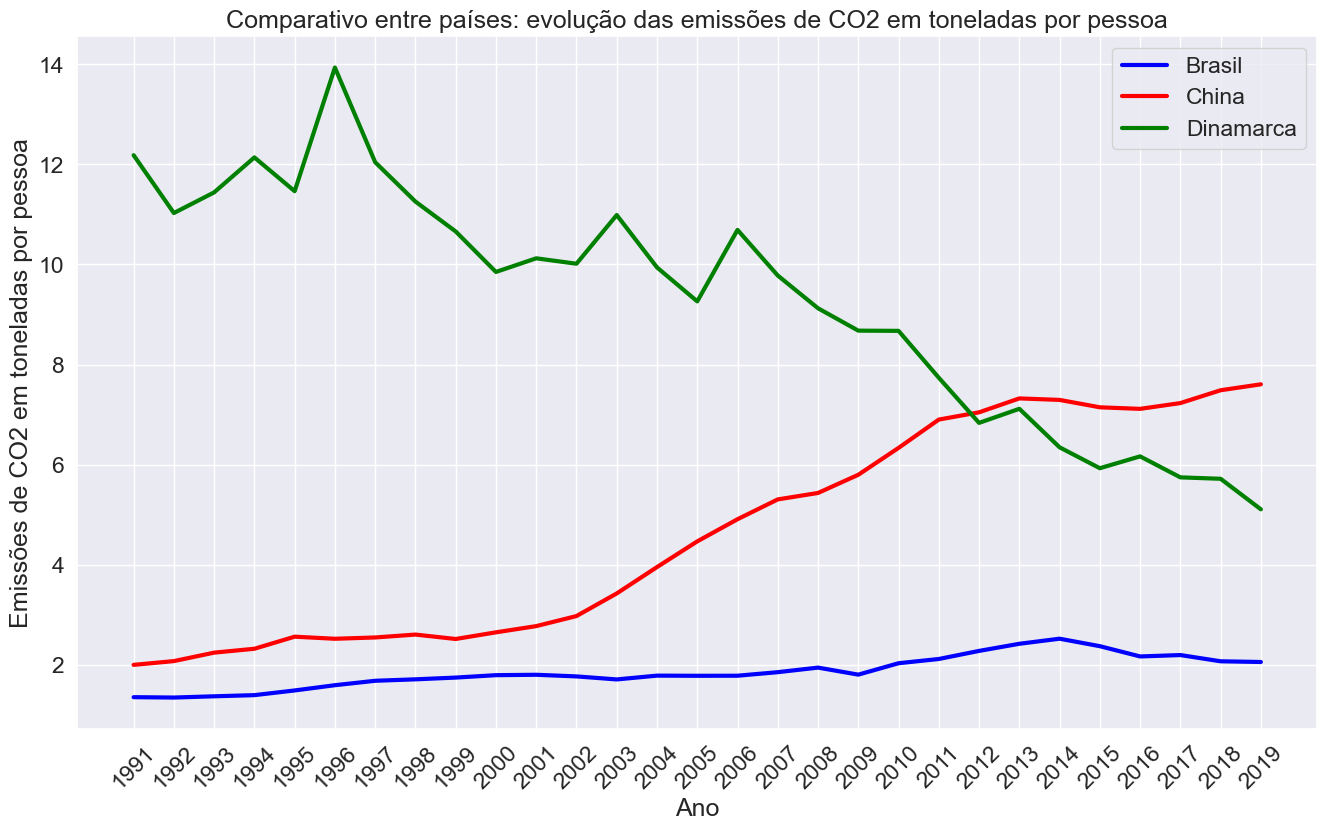

In [57]:
df_brasil = df[df['Country Name'] == 'Brazil']
df_china = df[df['Country Name'] == 'China']
df_dinamarca = df[df['Country Name'] == 'Denmark']

df_brasil = df_brasil.drop(['Country Code', 'Country Name', 'Indicator Name', 'Indicator Code'], axis=1)
df_china = df_china.drop(['Country Code', 'Country Name', 'Indicator Name', 'Indicator Code'], axis=1)
df_dinamarca = df_dinamarca.drop(['Country Code', 'Country Name', 'Indicator Name', 'Indicator Code'], axis=1)

df_brasil = df_brasil.transpose()
df_china = df_china.transpose()
df_dinamarca = df_dinamarca.transpose()

df_brasil.columns = ['Emissões de CO2 em toneladas por pessoa']
df_china.columns = ['Emissões de CO2 em toneladas por pessoa']
df_dinamarca.columns = ['Emissões de CO2 em toneladas por pessoa']

sns.set(rc={'figure.figsize':(16, 9)}, font_scale = 1.5, style='darkgrid')
sns.lineplot(data=df_brasil, linewidth=3, palette=['blue'], label='Brasil', legend=False)
sns.lineplot(data=df_china, linewidth=3, palette=['red'], label='China', legend=False)
sns.lineplot(data=df_dinamarca, linewidth=3, palette=['green'], label='Dinamarca', legend=False)
plt.title('Comparativo entre países: evolução das emissões de CO2 em toneladas por pessoa')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 em toneladas por pessoa')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Atividade Prática Supervisionada - Parte 2

### Lendo os dados

In [58]:
#read and create data for carbon output and renable energy
path = 'data/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_4353266/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_4353266.csv'
df_carbon = pd.read_csv(path, skiprows=4, sep=',', decimal='.', encoding='latin1')
path = 'data/API_EG.FEC.RNEW.ZS_DS2_en_csv_v2_4499549/API_EG.FEC.RNEW.ZS_DS2_en_csv_v2_4499549.csv'
df_renew = pd.read_csv(path, skiprows=4, sep=',', decimal='.', encoding='latin1')
# Utilizar apenas os dados disponíveis (entre 1960 e 2019)
for i in range(1960, 1991):
    del df_carbon[str(i)]
    del df_renew[str(i)]
df_carbon.drop(['2020', '2021', 'Unnamed: 66'], axis=1, inplace=True)
df_renew.drop(['2020', '2021', 'Unnamed: 66'], axis=1, inplace=True)

df_carbon.head()
df_renew.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,0.234955,0.238778,0.195134,0.183241,0.173372,0.167474,...,5.460000,5.660000,6.860000,6.890000,6.930000,6.730000,6.99,6.70,8.02,7.48
1,Africa Eastern and Southern,AFE,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,62.876319,64.636541,65.291676,65.379764,64.982510,64.218668,...,62.747757,62.573145,61.081094,60.378305,60.712292,61.106397,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,17.036444,26.521629,30.585667,32.796251,35.075640,37.945748,...,15.150000,12.610000,15.360000,16.860000,18.930000,17.530000,19.92,19.21,17.96,18.51
3,Africa Western and Central,AFW,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,85.443014,83.983071,85.305307,86.763667,86.348199,85.281256,...,80.926348,79.508850,79.017981,77.445937,76.190412,76.752857,NaN,NaN,NaN,NaN
4,Angola,AGO,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,71.888639,72.723283,71.277056,72.220269,73.945888,73.139600,...,52.510000,51.060000,49.470000,47.950000,48.230000,47.840000,49.03,56.25,57.36,54.69


### Filtragem e elaboração dos gráficos

In [59]:
df_carbon_brasil = df_carbon[df_carbon['Country Name'] == 'Brazil']
df_carbon_china = df_carbon[df_carbon['Country Name'] == 'China']
df_carbon_dinamarca = df_carbon[df_carbon['Country Name'] == 'Denmark']

df_renew_brasil = df_renew[df_renew['Country Name'] == 'Brazil']
df_renew_china = df_renew[df_renew['Country Name'] == 'China']
df_renew_dinamarca = df_renew[df_renew['Country Name'] == 'Denmark']

df_carbon_brasil = df_carbon_brasil.drop(['Country Code', 'Country Name', 'Indicator Name', 'Indicator Code'], axis=1)
df_carbon_china = df_carbon_china.drop(['Country Code', 'Country Name', 'Indicator Name', 'Indicator Code'], axis=1)
df_carbon_dinamarca = df_carbon_dinamarca.drop(['Country Code', 'Country Name', 'Indicator Name', 'Indicator Code'], axis=1)

df_renew_brasil = df_renew_brasil.drop(['Country Code', 'Country Name', 'Indicator Name', 'Indicator Code'], axis=1)
df_renew_china = df_renew_china.drop(['Country Code', 'Country Name', 'Indicator Name', 'Indicator Code'], axis=1)
df_renew_dinamarca = df_renew_dinamarca.drop(['Country Code', 'Country Name', 'Indicator Name', 'Indicator Code'], axis=1)

df_carbon_brasil = df_carbon_brasil.transpose()
df_carbon_china = df_carbon_china.transpose()
df_carbon_dinamarca = df_carbon_dinamarca.transpose()

df_renew_brasil = df_renew_brasil.transpose()
df_renew_china = df_renew_china.transpose()
df_renew_dinamarca = df_renew_dinamarca.transpose()

df_carbon_brasil.columns = ['Emissões de CO2 em toneladas por pessoa']
df_carbon_china.columns = ['Emissões de CO2 em toneladas por pessoa']
df_carbon_dinamarca.columns = ['Emissões de CO2 em toneladas por pessoa']

df_renew_brasil.columns = ['Energia renovável em % do total de energia consumida']
df_renew_china.columns =['Energia renovável em % do total de energia consumida']
df_renew_dinamarca.columns =['Energia renovável em % do total de energia consumida']

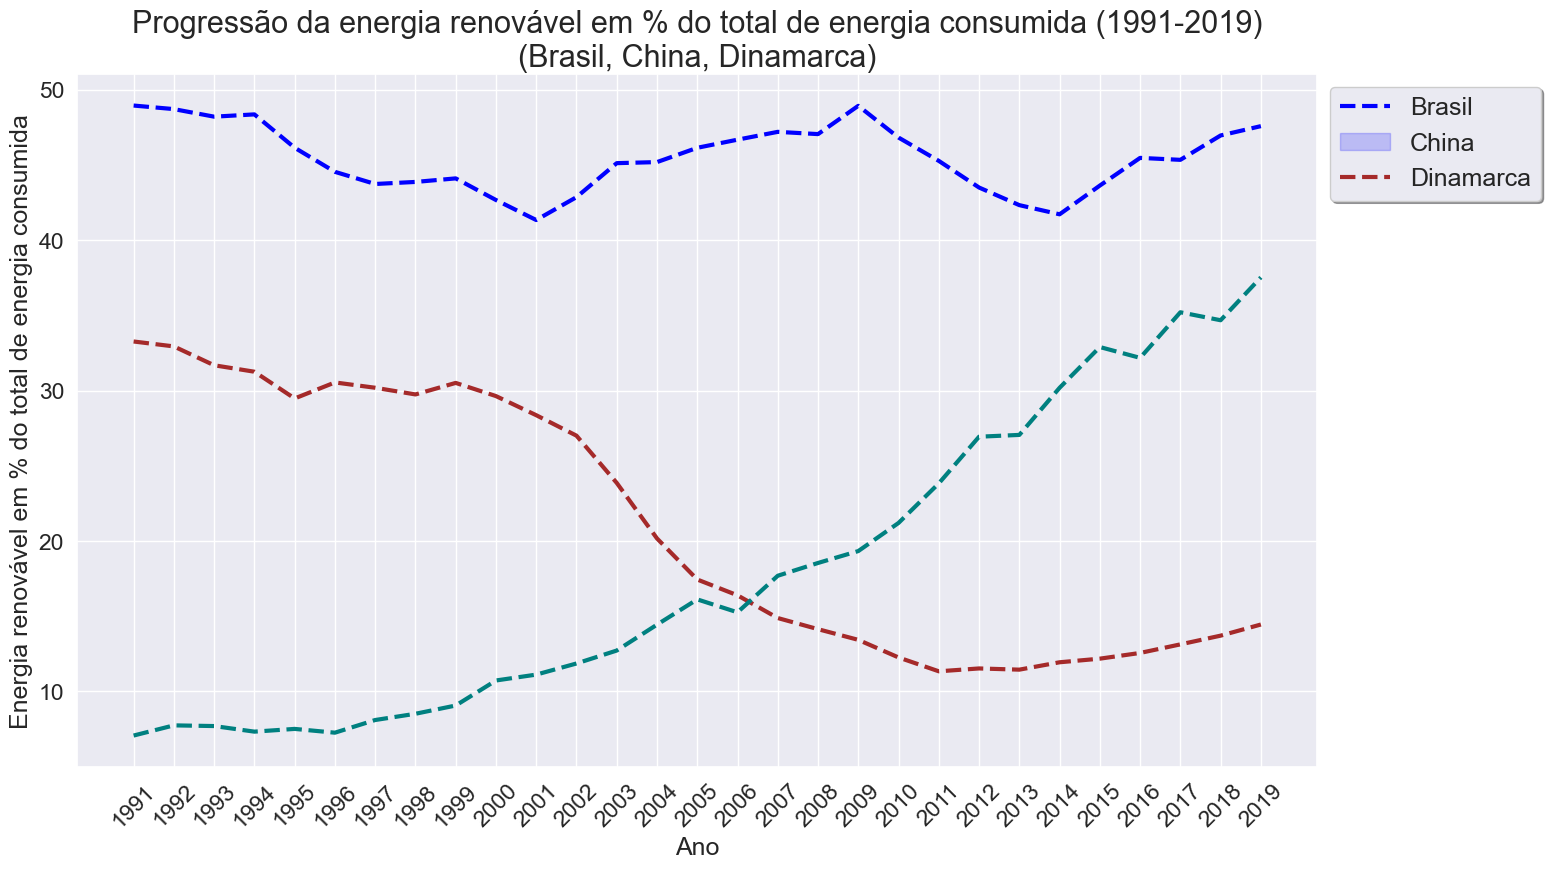

In [73]:
sns.set(rc={'figure.figsize':(16, 9)}, font_scale = 1.5, style='darkgrid')
#Plotando gráfivo de emissões de CO2
bx = sns.lineplot(data=df_renew_brasil, linewidth=3, palette=['blue'], label='Brasil - Energia renovável em % do total de energia consumida', legend=False)
bx = sns.lineplot(data=df_renew_china, linewidth=3, palette=['brown'], label='China - Energia renovável em % do total de energia consumida', legend=False)
bx = sns.lineplot(data=df_renew_dinamarca, linewidth=3, palette=['teal'], label='Dinamarca - Energia renovável em % do total de energia consumida', legend=False)

bx.lines[0].set_linestyle("--")
bx.lines[1].set_linestyle("--")
bx.lines[2].set_linestyle("--")

plt.title('Progressão da energia renovável em % do total de energia consumida (1991-2019)\n(Brasil, China, Dinamarca)', fontsize=22)
plt.xlabel('Ano')
plt.ylabel('Energia renovável em % do total de energia consumida')
plt.xticks(rotation=45)
plt.legend(['Brasil', 'China', 'Dinamarca'],loc='upper left', bbox_to_anchor=(1, 1), ncol=1, fontsize=18, frameon=True, shadow=True, fancybox=True)
plt.show()

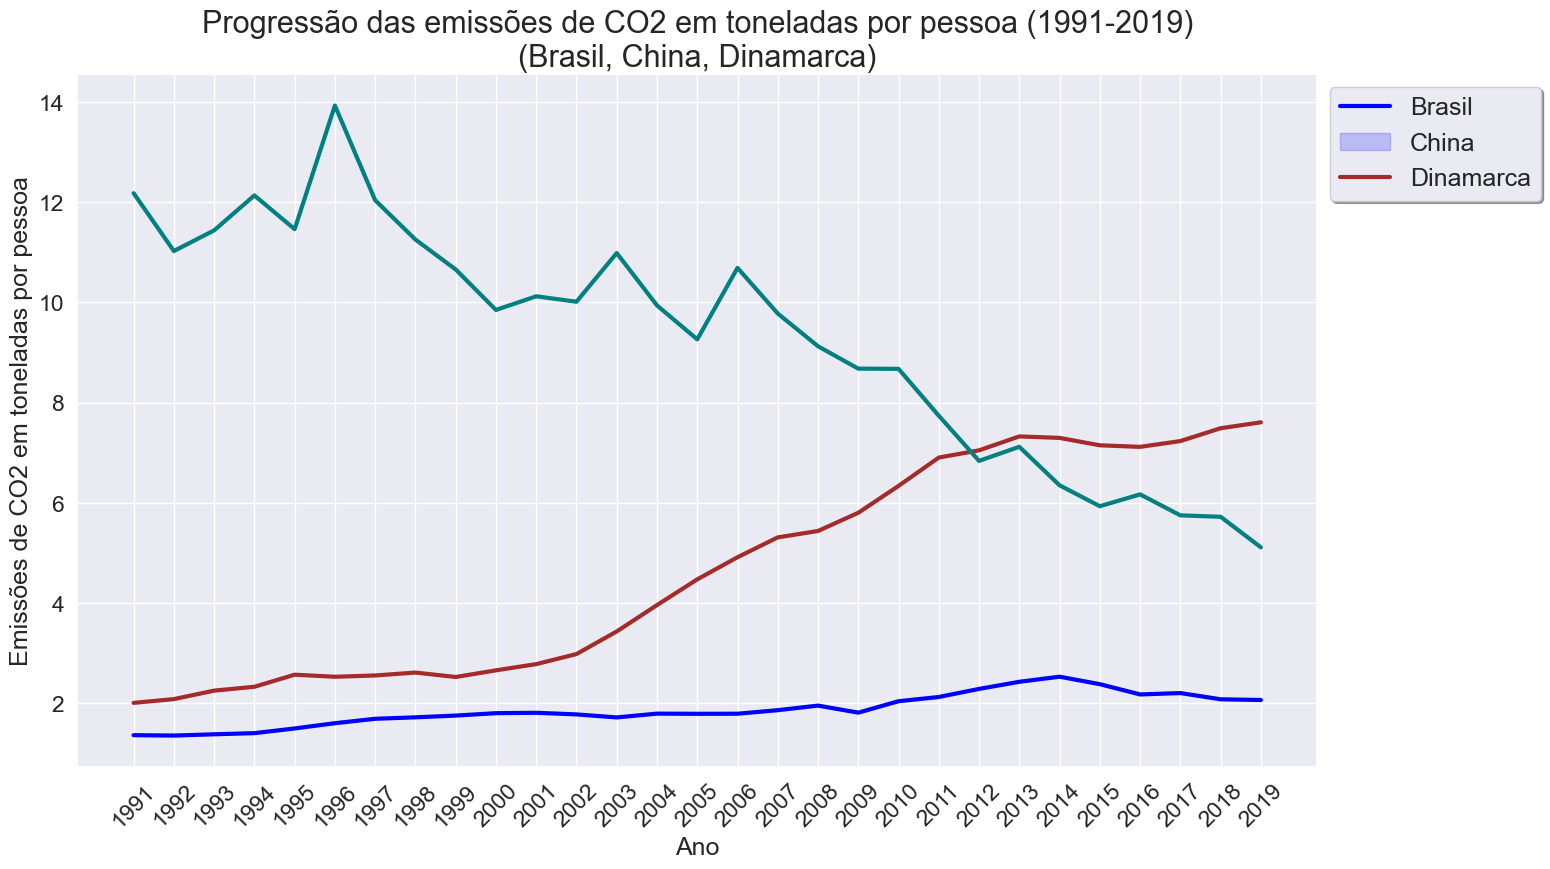

In [61]:
ax = sns.lineplot(data=df_carbon_brasil, linewidth=3, palette=['blue'], label='Brasil - Emissões de CO2 em toneladas por pessoa', legend=False)
ax = sns.lineplot(data=df_carbon_china, linewidth=3, palette=['brown'], label='China - Emissões de CO2 em toneladas por pessoa', legend=False)
ax = sns.lineplot(data=df_carbon_dinamarca, linewidth=3, palette=['teal'], label='Dinamarca - Emissões de CO2 em toneladas por pessoa', legend=False)

plt.title('Progressão das emissões de CO2 em toneladas por pessoa (1991-2019)\n(Brasil, China, Dinamarca)', fontsize=22)
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 em toneladas por pessoa')
plt.xticks(rotation=45)
plt.legend(['Brasil', 'China', 'Dinamarca'], loc='upper left', bbox_to_anchor=(1, 1), ncol=1, fontsize=18, frameon=True, shadow=True, fancybox=True)
plt.show()

### Mesclando os DFs por país


In [62]:
df_carbon_brasil.head()
df_renew_brasil.head()

df_brasil = pd.concat([df_carbon_brasil, df_renew_brasil], axis=1)

df_carbon_china.head()
df_renew_china.head()

df_china = pd.concat([df_carbon_china, df_renew_china], axis=1)

df_carbon_dinamarca.head()
df_renew_dinamarca.head()
df_dinamarca = pd.concat([df_carbon_dinamarca, df_renew_dinamarca], axis=1)

<h2> Correlação dos dataframes do Brasil </h2>

In [63]:
df_brasil.corr()

,Emissões de CO2 em toneladas por pessoa,Energia renovável em % do total de energia consumida
Emissões de CO2 em toneladas por pessoa,1.000000,-0.501237
Energia renovável em % do total de energia consumida,-0.501237,1.000000


<h2> Covariância dos dataframes do Brasil </h2>

In [64]:
df_brasil.cov()

,Emissões de CO2 em toneladas por pessoa,Energia renovável em % do total de energia consumida
Emissões de CO2 em toneladas por pessoa,0.103420,-0.358136
Energia renovável em % do total de energia consumida,-0.358136,4.936301


<h2> Correlação dos dataframes da China </h2>

In [65]:
df_china.corr()

,Emissões de CO2 em toneladas por pessoa,Energia renovável em % do total de energia consumida
Emissões de CO2 em toneladas por pessoa,1.00000,-0.96112
Energia renovável em % do total de energia consumida,-0.96112,1.00000


<h2> Covariância dos dataframes da China </h2>

In [66]:
df_china.cov()

,Emissões de CO2 em toneladas por pessoa,Energia renovável em % do total de energia consumida
Emissões de CO2 em toneladas por pessoa,4.471181,-17.238027
Energia renovável em % do total de energia consumida,-17.238027,71.944569


<h2> Correlação dos dataframes da Dinamarca </h2>

In [67]:
df_dinamarca.corr()

,Emissões de CO2 em toneladas por pessoa,Energia renovável em % do total de energia consumida
Emissões de CO2 em toneladas por pessoa,1.000000,-0.966245
Energia renovável em % do total de energia consumida,-0.966245,1.000000


<h2> Covariância dos dataframes da Dinamarca </h2>

In [68]:
df_dinamarca.cov()

,Emissões de CO2 em toneladas por pessoa,Energia renovável em % do total de energia consumida
Emissões de CO2 em toneladas por pessoa,5.616402,-23.144690
Energia renovável em % do total de energia consumida,-23.144690,102.157399


## Conclusão
Para esta parte da atividade, o grupo selecionou um novo indicador que pode estar relacionado com o indicador principal: <strong>variação na emissão de gás carbônico em toneladas métricas por pessoa</strong>. A análise gráfica e de correlações feita permitirá identificar se há uma relação entre os dois indicadores. O indicador secundário selecionado pelo grupo foi a <strong>porcentagem da matriz energética dos países analisados que é proveniente de fontes renováveis</strong>.

Para tal análise, o grupo continuou com os mesmos países selecionados anteriormente: Brasil, China e Dinamarca, sendo a Dinamarca um país avançado na ODS escolhida por estar reduzindo suas emissões, o Brasil um país neutro, mantendo suas emissões praticamente constantes, e a China, um país atrasado, com seus níveis de emissão aumentando. 

A hipótese do grupo é a de que países que apresentam um aumento na porcentagem de uso de fontes renováveis na matriz energética, apresentam uma redução na emissão de gás carbônico em toneladas métricas por pessoa. Tal hipótese se dá devido ao fato de que a queima de combistíveis fósseis voltadas à matriz energética é responsável por quase 75% de todas as emissões de CO2 no mundo; portanto, um aumento na participação de energias renováveis na matriz energética de um país deve resultar em uma redução na emissão de CO2.

## Análise de Correlações

Após elaborar e analisar os gráficos, é possível observar que a hipótese apontada pelo grupo pode ser aceita. Enquanto as emissões de CO2 na Dinamarca apresentam queda, a porcentagem de fontes renováveis na matriz energética aumenta. Na China, as emissões de CO2 apresentam um aumento enquanto a porcentagem de fontes renováveis na matriz energética diminui. No Brasil, as emissões de CO2 se mantém praticamente constantes, assim como a porcentagem de fontes renováveis na matriz energética, que passa por altos e baixos mas se mantém, em média, entre 40 e 50%.

Analisando, agora, as correlações e variâncias:
- Na China, a correlação e covariância são negativas, sendo a correlação de aproximadamente -0.96, muito forte, o que confirma a hipótese do grupo.
- Na Dinamarca, o mesmo ocorre; covariância e correlação negativas e sendo essa de aproximadamente -0.97, também muito forte. 
- No Brasil, a correlação é de aproximadamente -0.5, uma correlação moderada, e com uma covariância negativa. Não é uma correlação tão forte quanto as anteriores, mas ainda não é desprezível a ponto de anular a hipótese do grupo.

## Alterações na APS1
- Retiramos os gráficos de regressão linear individuais por país, pois não havia necessidade deles para a análise.
- Alteramos o nosso indicador principal para a variação na emissão de CO2 ao longo do tempo.

<h1>Referências Bibliográficas</h1>

https://pt.green-ecolog.com/15340443-main-sources-of-co2-emissions

https://mundoeducacao.uol.com.br/amp/biologia/ciclo-carbono.htm

https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide

https://www.dailymail.co.uk/sciencetech/article-9955699/Global-warming-actually-causing-colder-winters-making-polar-vortex-stretch-south-US.html

https://www.iea.org/news/global-co2-emissions-rebounded-to-their-highest-level-in-history-in-2021

https://data.worldbank.org/indicator/EN.ATM.CO2E.PC?most_recent_year_desc=true

Alunos: Felipe Maluli, Lucca Hiratsuca, Thomas Chiari